# Packages

In [82]:
import os
import csv
import glob
import torch
import scipy.io
import PIL.Image
import collections
import numpy as np
import pandas as pd
import torchvision.transforms
import torchvision.datasets as datasets

from pathlib import Path
from torchvision import transforms
from torch.utils.data import Dataset

In [80]:
meta_file_path = '/mnt/data/sixiongshan/data/vggface2/identity_meta.csv'
data_root = '/mnt/data/sixiongshan/data/vggface2/train'
traindir = data_root

In [180]:
dd = pd.read_csv(meta_file_path, 
                 sep=',\s+', 
                 encoding='utf-8',
                 engine='python')

In [205]:
dd

,Class_ID,Name,Sample_Num,Flag,Gender
0,n000001,"""14th_Dalai_Lama""",424,0,m
1,n000002,"""A_Fine_Frenzy""",315,1,f
2,n000003,"""A._A._Gill""",205,1,m
3,n000004,"""A._J._Buckley""",387,1,m
4,n000005,"""A._J._Pierzynski""",229,1,m
5,n000006,"""A._R._Rahman""",485,1,m
6,n000007,"""A._Raja""",259,1,m
7,n000008,"""AB_de_Villiers""",273,1,m
8,n000009,"""AYAMI""",136,0,f
9,n000010,"""Aamani""",156,1,f


In [171]:
df

,Class_ID,Name,Sample_Num,Flag,Gender,class
0,n000001,"""14th_Dalai_Lama""",424,0,m,-1
1,n000002,"""A_Fine_Frenzy""",315,1,f,-1
2,n000003,"""A._A._Gill""",205,1,m,-1
3,n000004,"""A._J._Buckley""",387,1,m,-1
4,n000005,"""A._J._Pierzynski""",229,1,m,-1
5,n000006,"""A._R._Rahman""",485,1,m,-1
6,n000007,"""A._Raja""",259,1,m,-1
7,n000008,"""AB_de_Villiers""",273,1,m,-1
8,n000009,"""AYAMI""",136,0,f,-1
9,n000010,"""Aamani""",156,1,f,-1


In [69]:
RGB_MEAN = [0.485, 0.456, 0.406]
RGB_STD = [0.229, 0.224, 0.225]

In [78]:
train_transform = transforms.Compose([transforms.Resize(256), 
                                      transforms.RandomCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean = RGB_MEAN,
                                                           std = RGB_STD)])

val_transform = transforms.Compose([transforms.Resize(256), 
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean = RGB_MEAN,
                                                         std = RGB_STD)])

In [34]:
def get_id_label_map(meta_file_path):
    """
    Make a mapping from Class_ID to real numbers.
    """
    # Read in the CSV
    df = pd.read_csv(meta_file_path, 
                     sep=',\s+', 
                     quoting=csv.QUOTE_ALL, 
                     encoding='utf-8', 
                     engine='python')
    
    # Create label
    df['class'] = range(len(df))
    key = df['Class_ID'].values
    val = df['class'].values
    
    # Format Dictionary
    id_label_dict = dict(zip(key, val))
    return id_label_dict

In [31]:
id_label_dict = get_id_label_map(meta_file_path)

In [51]:
image_list_file = '/mnt/data/sixiongshan/data/vggface2/train/n008632/'

In [84]:
df.head()

,Class_ID,Name,Sample_Num,Flag,Gender,class
0,n000001,"""14th_Dalai_Lama""",424,0,m,-1
1,n000002,"""A_Fine_Frenzy""",315,1,f,-1
2,n000003,"""A._A._Gill""",205,1,m,-1
3,n000004,"""A._J._Buckley""",387,1,m,-1
4,n000005,"""A._J._Pierzynski""",229,1,m,-1


In [87]:
image_list_file_train = '/mnt/data/sixiongshan/data/vggface2/train/n008632/'
image_list_file_test = '/mnt/data/sixiongshan/data/vggface2/test/n008632/'


In [88]:
for i, file in enumerate(glob.glob(image_list_file_test + '*.jpg')):
    print(file)

/mnt/data/sixiongshan/data/vggface2/test/n008632/0287_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0465_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0363_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0083_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0461_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0283_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0339_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0028_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0378_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0196_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0326_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0233_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0018_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0217_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0203_01.jpg
/mnt/data/sixiongshan/data/vggface2/test/n008632/0291_01.jpg
/mnt/data/sixiongshan/da

In [201]:
class VGG_Face2(Dataset):
    
    def __init__(self,
                 root: str='/mnt/data/sixiongshan/data/vggface2/train',
                 folder: str='n009177',
                 train: bool=True,
                 transform: bool=True):
        
        self.root = root
        self.folder = folder
        self.train = train
        self.data_path = root + '/' + folder
        self.transform = transform
        self.img_info = []
        
        # Save image information
        for i, file in enumerate(glob.glob(self.data_path + '/*.jpg')):
            file = file.strip()
            class_id = file.split('/')[- 2]  # e.g. n004332
            self.img_info.append({'class_id': class_id,
                                  'source': file})
        
        # Transformers
        self.train_transform = transforms.Compose([transforms.Resize(256), 
                                                   transforms.RandomCrop(224),
                                                   transforms.ToTensor(),
                                                   transforms.Normalize(mean = RGB_MEAN,
                                                                        std = RGB_STD)])

        self.test_transform = transforms.Compose([transforms.Resize(256), 
                                                  transforms.CenterCrop(224),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = RGB_MEAN,
                                                                       std = RGB_STD)])

    def __getitem__(self, index):
        info = self.img_info[index]
        source = info['source']
        class_id = info['class_id']
        img = PIL.Image.open(os.path.join(self.root, source))
        
        if not self.transform:
            return index, img, class_id
        
        if self.train:
            img = self.train_transform(img)
        else:
            img = self.test_transform(img)
        return index, img, class_id

    def __len__(self):
        return len(self.img_info)

In [202]:
test_raw = VGG_Face2(transform=False)
test = VGG_Face2()

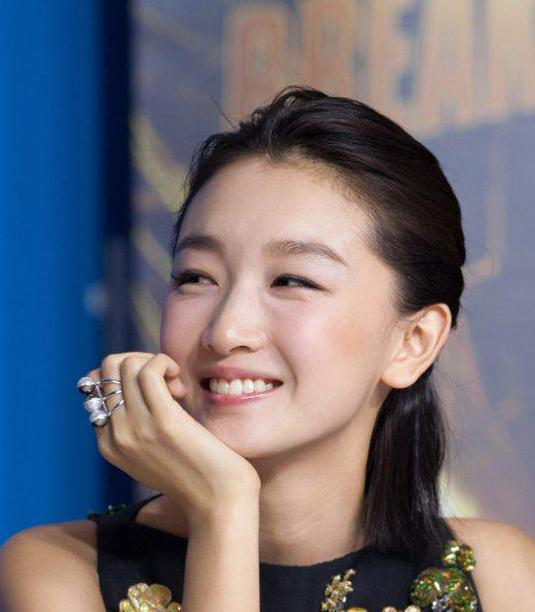

In [204]:
test_raw[22][1]

In [195]:
test[10][1].shape

torch.Size([3, 224, 224])

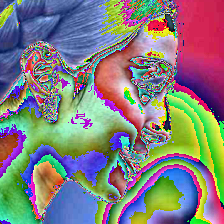

In [196]:
transforms.ToPILImage()(test[20][1]).convert('RGB')

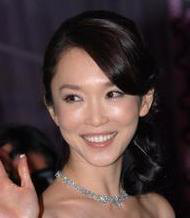

In [61]:
class VGG_Faces2(Dataset):

    mean_bgr = np.array([91.4953, 103.8827, 131.0912])  # from resnet50_ft.prototxt

    def __init__(self, 
                 root='/mnt/data/sixiongshan/data/vggface2/train', 
                 image_list_file='/mnt/data/sixiongshan/data/vggface2/train/n008632/', 
                 meta_file_path='/mnt/data/sixiongshan/data/vggface2/identity_meta.csv', 
                 split='train', 
                 transform=True,
                 horizontal_flip=False, 
                 upper=None):
        """
        root: dataset directory
        image_list_file: contains image file names under root
        id_label_dict: X[class_id] -> label
        split: train or valid
        transform: 
        horizontal_flip:
        upper: max number of image used for debug
        """
        assert os.path.exists(root)
        
        self.root = root
        self.image_list_file = image_list_file
        self.split = split
        self._transform = transform
        self.id_label_dict = get_id_label_map(meta_file_path)
        self.horizontal_flip = horizontal_flip
        self.img_info = []
        
        for i, file in enumerate(glob.glob(image_list_file + '*.jpg')):
            img_file = file.strip()
            print(img_file)
            class_id = img_file.split("/")[-2]  # like n004332
            print(class_id)
            label = self.id_label_dict[class_id]
            self.img_info.append({
                    'cid': class_id,
                    'img': img_file,
                    'lbl': label})
            if i % 1000 == 0:
                print("processing: {} images for {}".format(i, self.split))
            if upper and i == upper - 1:  # for debug purpose
                break

    def __len__(self):
        return len(self.img_info)

    def __getitem__(self, index):
        info = self.img_info[index]
        img_file = info['img']
        img = PIL.Image.open(os.path.join(self.root, img_file))
        img = torchvision.transforms.Resize(256)(img)
        if self.split == 'train':
            img = torchvision.transforms.RandomCrop(224)(img)
            img = torchvision.transforms.RandomGrayscale(p=0.2)(img)
        else:
            img = torchvision.transforms.CenterCrop(224)(img)
        if self.horizontal_flip:
            img = torchvision.transforms.functional.hflip(img)

        img = np.array(img, dtype=np.uint8)
        assert len(img.shape) == 3  # assumes color images and no alpha channel

        label = info['lbl']
        class_id = info['cid']
        if self._transform:
            return self.transform(img), label, img_file, class_id
        else:
            return img, label, img_file, class_id

    def transform(self, img):
        img = img[:, :, ::-1]  # RGB -> BGR
        img = img.astype(np.float32)
        img -= self.mean_bgr
        img = img.transpose(2, 0, 1)  # C x H x W
        img = torch.from_numpy(img).float()
        return img

    def untransform(self, img, lbl):
        img = img.numpy()
        img = img.transpose(1, 2, 0)
        img += self.mean_bgr
        img = img.astype(np.uint8)
        img = img[:, :, ::-1]
        return img, lbl

In [85]:
example.img_info

[{'cid': 'n008632',
  'img': '/mnt/data/sixiongshan/data/vggface2/train/n008632/0445_02.jpg',
  'lbl': 8486},
 {'cid': 'n008632',
  'img': '/mnt/data/sixiongshan/data/vggface2/train/n008632/0310_01.jpg',
  'lbl': 8486},
 {'cid': 'n008632',
  'img': '/mnt/data/sixiongshan/data/vggface2/train/n008632/0324_01.jpg',
  'lbl': 8486},
 {'cid': 'n008632',
  'img': '/mnt/data/sixiongshan/data/vggface2/train/n008632/0176_01.jpg',
  'lbl': 8486},
 {'cid': 'n008632',
  'img': '/mnt/data/sixiongshan/data/vggface2/train/n008632/0166_01.jpg',
  'lbl': 8486},
 {'cid': 'n008632',
  'img': '/mnt/data/sixiongshan/data/vggface2/train/n008632/0477_02.jpg',
  'lbl': 8486},
 {'cid': 'n008632',
  'img': '/mnt/data/sixiongshan/data/vggface2/train/n008632/0182_01.jpg',
  'lbl': 8486},
 {'cid': 'n008632',
  'img': '/mnt/data/sixiongshan/data/vggface2/train/n008632/0270_01.jpg',
  'lbl': 8486},
 {'cid': 'n008632',
  'img': '/mnt/data/sixiongshan/data/vggface2/train/n008632/0287_01.jpg',
  'lbl': 8486},
 {'cid': '

In [62]:
example = VGG_Faces2()

/mnt/data/sixiongshan/data/vggface2/train/n008632/0445_02.jpg
n008632
processing: 0 images for train
/mnt/data/sixiongshan/data/vggface2/train/n008632/0310_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0324_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0176_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0166_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0477_02.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0182_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0270_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0287_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0089_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0044_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0080_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0458_01.jpg
n008632
/mnt/data/sixiongshan/data/vggface2/train/n008632/0254_02.j

In [66]:
example[0][0]

tensor([[[ -89.4953,  -89.4953,  -89.4953,  ...,  -91.4953,  -91.4953,
           -91.4953],
         [ -89.4953,  -89.4953,  -89.4953,  ...,  -91.4953,  -91.4953,
           -91.4953],
         [ -89.4953,  -89.4953,  -89.4953,  ...,  -91.4953,  -91.4953,
           -91.4953],
         ...,
         [ 124.5047,  127.5047,  126.5047,  ...,  -79.4953,  -77.4953,
           -82.4953],
         [ 122.5047,  124.5047,  125.5047,  ...,  -78.4953,  -79.4953,
           -85.4953],
         [ 122.5047,  122.5047,  125.5047,  ...,  -75.4953,  -83.4953,
           -88.4953]],

        [[-101.8827, -101.8827, -101.8827,  ..., -103.8827, -103.8827,
          -103.8827],
         [-101.8827, -101.8827, -101.8827,  ..., -103.8827, -103.8827,
          -103.8827],
         [-101.8827, -101.8827, -101.8827,  ..., -103.8827, -103.8827,
          -103.8827],
         ...,
         [ 112.1173,  115.1173,  114.1173,  ...,  -91.8827,  -89.8827,
           -94.8827],
         [ 110.1173,  112.1173,  113.117